In [1]:
import pandas as pd
import numpy as np

df = pd.read_table('~/Downloads/INFO_4604/AwarenessVsInfection_month.tsv')

new_df = df.loc[:,['Twitter_Id','Twitter_content','intent']]
df2 = new_df.rename(index=str, columns={"Twitter_Id": "ID", "Twitter_content": "Text", "intent": "Illness"})

df2.head()

,ID,Text,Illness
0,4063561008,you gotta be kidding me .. everyone around me ...,0
1,4063912301,getting my flu shot then babysitting .,1
2,4064279613,my arm is getting sore from that damn flu shot...,1
3,4066630902,seems like these bird profile pics are spreadi...,1
4,4066949107,i think i'm in the process of getting the flu ...,0


In [2]:
import json

tweets = []
for line in open('AwarenessVsInfection2009TweetIDs.json', 'r'):
    json_line = json.loads(line)
    tweets.append(json_line)


In [3]:
for line in open('AwarenessVsInfection2012TweetIDs.json', 'r'):
    json_line = json.loads(line)
    tweets.append(json_line)


In [4]:
df_url = pd.DataFrame(columns=['ID','text_full','URL_present','domain','pic'])

count = 0

for tweet in tweets:
    df_url.loc[count,'ID'] = tweet['id']
    count = count + 1

count = 0

for tweet in tweets:
    df_url.loc[count,'text_full'] = tweet['text']
    count = count + 1  

df_url.head()

,ID,text_full,URL_present,domain,pic
0,6004314210,Swine Flu has arrived at my daughter's kinderg...,NaN,NaN,NaN
1,6003319713,Getting a little fed up with having (Insert Ra...,NaN,NaN,NaN
2,5991525204,Just getting over swine flu. It must have bee...,NaN,NaN,NaN
3,5989718714,this flu season is a horrible. everyone is get...,NaN,NaN,NaN
4,5986621813,so glad @blakewsmith won't be getting the pig ...,NaN,NaN,NaN


In [5]:
import re

all_urls = []

r = re.compile('(http[s]*://[\S^\.]+(?:\.[\S^\.\)]+)+)')

for i in range(df_url.shape[0]):
    text = df_url.iloc[i,1]
    urls = r.findall(text)
    all_urls.append(urls)
    

In [6]:
all_urls

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 ['http://tinyurl.com/yereux6'],
 [],
 [],
 [],
 ['http://bit.ly/2MiURn'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['http://bit.ly/2nMqYN'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['http://ow.ly/DTDX'],
 [],
 [],
 ['http://ow.ly/Dqt4'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['http://tumblr.com/xl53q1f2f'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['http://bit.ly/2IQGkN'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['http://sn.im/tartp'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['http://sn.im/tartp'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['http:/

In [7]:
import requests

extended_urls = []

for urls in all_urls:
    e_urls = []
    for url in urls:
        session = requests.Session()
        try:
            resp = session.head(url, allow_redirects=True)
            e_urls.append(str(resp.url))
        except requests.exceptions.RequestException as e:
            break
    extended_urls.append(e_urls)

In [8]:
extended_urls

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 ['http://www.wildcatworld.com/2009/11/23/the-swine-flu-is-the-only-thing-calipari-is-worried-about-in-cancun/'],
 [],
 [],
 [],
 ['http://www.skysports.com/story/0,19528,11095_5657847,00.html'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['https://www.theatlantic.com/magazine/archive/2009/11/does-the-vaccine-matter/307723/'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['http://www.zazzle.com/i_survived_swine_flu_and_all_i_got_was_this_tshirt-235585301255928014?gl=designgroupies'],
 [],
 [],
 ['http://capecodonline.com/apps/pbcs.dll/article?AID=/20091117/OPINION/911170330/-1/NEWSMAP'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['http://pooooooopoooop-deactivated20151.tumblr.com/post/225134727/im-worri

In [9]:
extended_domains = []

r2 = re.compile('http[s]*://(.*?)(?=\/)')

for i in extended_urls:
    e_domains = []
    for j in i:
        text = j
        domains = r2.findall(text)
        e_domains.append(domains)
    extended_domains.append(e_domains)
        
extended_domains

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [['www.wildcatworld.com']],
 [],
 [],
 [],
 [['www.skysports.com']],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [['www.theatlantic.com']],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [['www.zazzle.com']],
 [],
 [],
 [['capecodonline.com']],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [['pooooooopoooop-deactivated20151.tumblr.com']],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [['www.facebook.com']],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [['sn.im']],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [['sn.im']],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],

In [10]:
tweetnum = 0
flag = False

for url_list in all_urls:
    for url in url_list:
        if r.match(url):
            df_url.loc[tweetnum,'URL_present'] = '1'
            flag = True
    if (flag==False):
        df_url.loc[tweetnum,'URL_present'] = '0'
    else:
        flag = False
    tweetnum = tweetnum + 1
    
df_url.head(10)

,ID,text_full,URL_present,domain,pic
0,6004314210,Swine Flu has arrived at my daughter's kinderg...,0,NaN,NaN
1,6003319713,Getting a little fed up with having (Insert Ra...,0,NaN,NaN
2,5991525204,Just getting over swine flu. It must have bee...,0,NaN,NaN
3,5989718714,this flu season is a horrible. everyone is get...,0,NaN,NaN
4,5986621813,so glad @blakewsmith won't be getting the pig ...,0,NaN,NaN
5,5986140306,@saracrow Luck luck. I got mine Friday. My ar...,0,NaN,NaN
6,5985417606,At home. I think I have the stomach flu or som...,0,NaN,NaN
7,5984946706,The swine flu is the only thing Calipari is wo...,1,NaN,NaN
8,5932814112,My stomach isn't feeling really good today and...,0,NaN,NaN
9,5932278302,"i think ive just about gotten over this flu, b...",0,NaN,NaN


In [11]:
tweetnum = 0
flag = False

r3 = re.compile('pic|flickr|\.jpg')

for url_list in extended_urls:
    for url in url_list:
        if r3.match(url):
            df_url.loc[tweetnum,'pic'] = '1'
            flag = True
    if (flag==False):
        df_url.loc[tweetnum,'pic'] = '0'
    else:
        flag = False
    tweetnum = tweetnum + 1
    
df_url.head(10)

,ID,text_full,URL_present,domain,pic
0,6004314210,Swine Flu has arrived at my daughter's kinderg...,0,NaN,0
1,6003319713,Getting a little fed up with having (Insert Ra...,0,NaN,0
2,5991525204,Just getting over swine flu. It must have bee...,0,NaN,0
3,5989718714,this flu season is a horrible. everyone is get...,0,NaN,0
4,5986621813,so glad @blakewsmith won't be getting the pig ...,0,NaN,0
5,5986140306,@saracrow Luck luck. I got mine Friday. My ar...,0,NaN,0
6,5985417606,At home. I think I have the stomach flu or som...,0,NaN,0
7,5984946706,The swine flu is the only thing Calipari is wo...,1,NaN,0
8,5932814112,My stomach isn't feeling really good today and...,0,NaN,0
9,5932278302,"i think ive just about gotten over this flu, b...",0,NaN,0


In [12]:
extended_domains

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [['www.wildcatworld.com']],
 [],
 [],
 [],
 [['www.skysports.com']],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [['www.theatlantic.com']],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [['www.zazzle.com']],
 [],
 [],
 [['capecodonline.com']],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [['pooooooopoooop-deactivated20151.tumblr.com']],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [['www.facebook.com']],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [['sn.im']],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [['sn.im']],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],

In [13]:
tweetnum = 0
flag = False

r4 = re.compile('.*')

for url_list in extended_domains:
    for urls in url_list:
        for url in urls:
            if r4.match(str(url)):
                df_url.loc[tweetnum,'domain'] = str(url)
                flag = True
    if (flag==False):
        df_url.loc[tweetnum,'domain'] = '0'
    else:
        flag = False
    tweetnum = tweetnum + 1
    
df_url.head(10)

,ID,text_full,URL_present,domain,pic
0,6004314210,Swine Flu has arrived at my daughter's kinderg...,0,0,0
1,6003319713,Getting a little fed up with having (Insert Ra...,0,0,0
2,5991525204,Just getting over swine flu. It must have bee...,0,0,0
3,5989718714,this flu season is a horrible. everyone is get...,0,0,0
4,5986621813,so glad @blakewsmith won't be getting the pig ...,0,0,0
5,5986140306,@saracrow Luck luck. I got mine Friday. My ar...,0,0,0
6,5985417606,At home. I think I have the stomach flu or som...,0,0,0
7,5984946706,The swine flu is the only thing Calipari is wo...,1,www.wildcatworld.com,0
8,5932814112,My stomach isn't feeling really good today and...,0,0,0
9,5932278302,"i think ive just about gotten over this flu, b...",0,0,0


In [14]:
import re
from collections import Counter

def ngrams(tokens, n):
    output = []
    for i in range(n-1, len(tokens)):
        ngram = ' '.join(tokens[i-n+1:i+1])
        output.append(ngram)
    return output

def skipgrams(tokens, n):
    output = []
    for i in range(n-1, len(tokens)):
        str1 = ''
        for j in range(n-2):
            str1 = str1+' * '
        skipgram = str(tokens[i-n+1])+str1+str(tokens[i])
        output.append(skipgram)
    return output

import itertools

def pairs(words):
    ret = itertools.combinations(words,2)
    return ret
   
import nltk

def parts_of_speech(words):
    tagged = []
    
    try:
        tagged = nltk.pos_tag(words)
        return(tagged)
        
    except Exception as e:
        print(e)

In [15]:
def features(text, df,  ngram_range=(1,3)):
    text = text.lower()      # make the string lowercase
    text = re.sub(r'(.)\1+', r'\1\1', text)     # remove consecutive characters that are repeated more than twice
    
    features_in_text = []   # running list of all features in this instance (can be repeated)
    
    # treat alphanumeric characters as word tokens (removing anything else),
    # and extract all n-grams of length n specified by ngram_range
    
    text_alphanum = re.sub('[^a-z0-9]', ' ', text)
    for n in range(ngram_range[0], ngram_range[1]+1):
        features_in_text += ngrams(text_alphanum.split(), n)
        #remove sentiment
    
    for n in range(3,5):
        features_in_text += skipgrams(text_alphanum.split(), n)
      
    features_in_text += str(pairs(text_alphanum.split()))
    features_in_text += str(parts_of_speech(text_alphanum.split()))
    # now treat punctuation as word tokens, and get their counts (only unigrams)
    
    text_punc = re.sub('[a-z0-9]', ' ', text)
    features_in_text += ngrams(text_punc.split(), 1)
    
    row = df[df['Text']==text]
    
    new_features = Counter()
    
    new_features += {'URL_present':0,'domain':0,'pic':0}
    
    for r in row.loc[:,'URL_present']:
        if not pd.isnull(r):
            new_features['URL_present'] += int(r)
    for r in row.loc[:,'domain']:
        if not pd.isnull(r) and r != '0':
            new_features[str(r)] += 1
    for r in row.loc[:,'pic']:
        if not pd.isnull(r):
            new_features['pic'] += int(r)
    
   
    # 'Counter' converts a list into a dictionary whose keys are the list elements 
    #  and the values are the number of times each element appeared in the list
    
    return Counter(features_in_text)+new_features

In [16]:
df_all = pd.merge(df_url, df2, on=['ID','ID'])

df_all.head()

,ID,text_full,URL_present,domain,pic,Text,Illness
0,6004314210,Swine Flu has arrived at my daughter's kinderg...,0,0,0,swine flu has arrived at my daughter's kinderg...,0
1,6003319713,Getting a little fed up with having (Insert Ra...,0,0,0,getting a little fed up with having ( insert r...,0
2,5991525204,Just getting over swine flu. It must have bee...,0,0,0,just getting over swine flu . it must have bee...,0
3,5989718714,this flu season is a horrible. everyone is get...,0,0,0,this flu season is a horrible . everyone is ge...,0
4,5986621813,so glad @blakewsmith won't be getting the pig ...,0,0,0,so glad USER won't be getting the pig flu this...,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

text_train, text_test, Y_train, Y_test = train_test_split(df_all['Text'], df_all['Illness'], test_size=0.4, random_state=0)

In [18]:
from sklearn.feature_extraction import DictVectorizer

vect = DictVectorizer()
X_train = vect.fit_transform(features(d, df_all, ngram_range=(1,3)) for d in text_train)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_recall_fscore_support

# this defines the classifier we will use -- don't change this variable

base_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123)

# these are the C values we will compare -- don't change this variable

params = [{'C': [0.01, 0.1, 0.5, 1.0, 2.5, 5.0, 10.0, 50.0, 100.0]}]

# this performs 5-fold cross-validation with the above classifier and parameter options

gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train, Y_train)

print("Best parameter settings:", gs_classifier.best_params_)
print("Validation accuracy: %0.6f" % gs_classifier.best_score_)

Best parameter settings: {'C': 5.0}
Validation accuracy: 0.805389


In [20]:
scores = cross_val_score(gs_classifier, X_train, Y_train, cv=5)
scores 

array([0.82462687, 0.79400749, 0.80898876, 0.79400749, 0.7752809 ])



Percentile vs. Accuracy for Ngram Range (1,3)


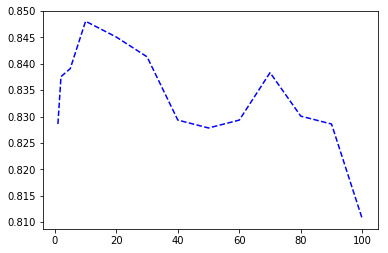



Percentile vs. F1 for Ngram Range (1,3)


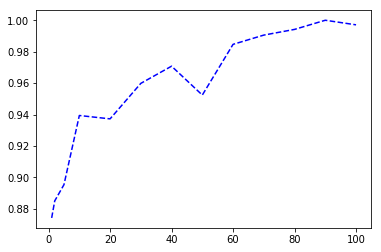

In [21]:
from sklearn.feature_selection import SelectPercentile, chi2
import matplotlib.pyplot as plt

percentiles = [1,2,5,10,20,30,40,50,60,70,80,90,100]
accuracies = []
f_scores = []

for p in range(len(percentiles)):
    selection = SelectPercentile(percentile=percentiles[p], score_func=chi2)
    X_train_selected = selection.fit_transform(X_train, Y_train)
    gs_classifier.fit(X_train_selected, Y_train)
    accuracies.append(gs_classifier.best_score_)
    f_scores.append(f1_score(Y_train, gs_classifier.predict(X_train_selected)))

print("\n\nPercentile vs. Accuracy for Ngram Range (1,3)")
plt.plot(percentiles, accuracies, 'b--')
plt.show()

print("\n\nPercentile vs. F1 for Ngram Range (1,3)")
plt.plot(percentiles, f_scores, 'b--')
plt.show()

In [22]:
X_train_final = vect.fit_transform(features(d, df_all, ngram_range=(1,3)) for d in text_train)
X_test_final = vect.transform(features(d, df_all, ngram_range=(1,3)) for d in text_test)

selection = SelectPercentile(percentile=60, score_func=chi2)
X_train_final = selection.fit_transform(X_train_final, Y_train)
X_test_final = selection.transform(X_test_final)

gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train_final, Y_train)

print("Validation accuracy: %0.6f" % gs_classifier.best_score_)
print("Test accuracy: %0.6f" % accuracy_score(Y_test, gs_classifier.predict(X_test_final)))

print("Validation F1: %0.6f" % f1_score(Y_train, gs_classifier.predict(X_train_final)))
print("Test F1: %0.6f" % f1_score(Y_test, gs_classifier.predict(X_test_final)))


#scores = cross_val_score(gs_classifier, X_train_final, Y_train, cv=5)
#scores 

Validation accuracy: 0.838323
Test accuracy: 0.795964
Validation F1: 0.976642
Test F1: 0.813906


In [23]:
selection = SelectPercentile(percentile=100, score_func=chi2)
X_train_final = selection.fit_transform(X_train_final, Y_train)
X_test_final = selection.transform(X_test_final)

gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train_final, Y_train)

print("Validation accuracy: %0.6f" % gs_classifier.best_score_)
print("Test accuracy: %0.6f" % accuracy_score(Y_test, gs_classifier.predict(X_test_final)))

print("Validation F1: %0.6f" % f1_score(Y_train, gs_classifier.predict(X_train_final)))
print("Test F1: %0.6f" % f1_score(Y_test, gs_classifier.predict(X_test_final)))

#scores = cross_val_score(gs_classifier, X_train_final, Y_train, cv=5)
#scores 

Validation accuracy: 0.836078
Test accuracy: 0.791480
Validation F1: 0.980220
Test F1: 0.809816


In [24]:
selection = SelectPercentile(percentile=95, score_func=chi2)
X_train_final = selection.fit_transform(X_train_final, Y_train)
X_test_final = selection.transform(X_test_final)

gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train_final, Y_train)

print("Validation accuracy: %0.6f" % gs_classifier.best_score_)
print("Test accuracy: %0.6f" % accuracy_score(Y_test, gs_classifier.predict(X_test_final)))

print("Validation F1: %0.6f" % f1_score(Y_train, gs_classifier.predict(X_train_final)))
print("Test F1: %0.6f" % f1_score(Y_test, gs_classifier.predict(X_test_final)))

#scores = cross_val_score(gs_classifier, X_train_final, Y_train, cv=5)
#scores 

Validation accuracy: 0.830838
Test accuracy: 0.783632
Validation F1: 0.972814
Test F1: 0.806419


In [25]:
X_train_final = vect.fit_transform(features(d, df_all, ngram_range=(1,3)) for d in text_train)
X_test_final = vect.transform(features(d, df_all, ngram_range=(1,3)) for d in text_test)

selection = SelectPercentile(percentile=60, score_func=chi2)
X_train_final = selection.fit_transform(X_train_final, Y_train)
X_test_final = selection.transform(X_test_final)

gs_classifier = GridSearchCV(base_classifier, params, cv=5)
gs_classifier.fit(X_train_final, Y_train)

print("Validation F1: %0.6f" % f1_score(Y_train, gs_classifier.predict(X_train_final)))
print("Test F1: %0.6f" % f1_score(Y_test, gs_classifier.predict(X_test_final)))


Validation F1: 0.987564
Test F1: 0.795569


In [ ]:
df_domains = pd.read_table('~/Downloads/dmoz0409.csv',sep=',',header=None)

df_domains.head()

,0,1,2
0,1,http://www.liquidgeneration.com/,Adult
1,2,http://www.onlineanime.org/,Adult
2,3,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,Adult
3,4,http://www.galeon.com/kmh/,Adult
4,5,http://www.fanworkrecs.com/,Adult


In [ ]:
tweetnum = 0

for domain in df_domains.iloc[:,1]:
    r4 = re.compile(str(domain))
    for url_list in extended_domains:
        for urls in url_list:
            for url in urls:
                if r4.match(str(url)):
                    df_url.loc[tweetnum,'domain'] = (str(url),str(df_domains.loc[dnum,2]))
                else:
                    df_url.loc[tweetnum,'domain'] = (str(url))
        tweetnum = tweetnum + 1
                                                     
df_url.head(10)